In [1]:
#"D:\Academics\Semester-6\A2- Artificial Intelligence\Project\Implementation\Dataset\Crop_recommendation.csv"

In [2]:
# libraries
import numpy as np
import pandas as pd

In [3]:
# inspect the dataset
df = pd.read_csv(r"D:\Academics\Semester-6\A2- Artificial Intelligence\Project\Implementation\Dataset\Crop_recommendation.csv")
X = df.drop(['label'], axis=1)
y = df.label
df.head()
# print(df.columns)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# missing data
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [18]:
pd.merge(df.groupby(['label'])['temperature', 'humidity', 'ph', 'rainfall'].min().round(2),
df.groupby(['label'])['temperature', 'humidity', 'ph', 'rainfall'].max().round(2),on="label").transpose().to_json()

C:\Users\santh\AppData\Local\Temp/ipykernel_4724/1270952526.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pd.merge(df.groupby(['label'])['temperature', 'humidity', 'ph', 'rainfall'].min().round(2),
C:\Users\santh\AppData\Local\Temp/ipykernel_4724/1270952526.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['label'])['temperature', 'humidity', 'ph', 'rainfall'].max().round(2),on="label").transpose()


label,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
temperature_x,21.04,25.01,25.10,17.02,25.01,23.06,22.00,8.83,23.09,15.33,...,27.00,24.02,27.01,27.02,10.01,23.01,18.32,18.07,20.05,24.04
humidity_x,90.03,75.03,60.07,14.26,90.02,50.05,75.01,80.02,70.88,18.09,...,45.02,40.01,80.03,90.02,90.01,90.04,30.40,85.13,80.12,80.03
ph_x,5.51,5.51,6.50,5.99,5.50,6.02,5.80,5.51,6.00,5.50,...,4.51,3.50,6.22,6.00,6.01,6.50,4.55,5.56,5.01,6.00
rainfall_x,100.12,90.11,60.42,65.11,131.09,115.16,60.65,65.01,150.24,60.28,...,89.29,30.92,36.12,20.21,100.17,40.35,90.05,102.52,182.56,40.13
temperature_y,24.00,29.91,34.95,21.00,29.87,27.92,25.99,41.95,26.99,24.92,...,35.99,32.00,29.91,29.94,34.91,43.68,36.98,24.96,26.93,26.99
humidity_y,94.92,84.98,69.96,19.97,99.98,69.95,84.88,83.98,89.89,24.97,...,54.96,64.96,90.00,94.96,94.96,94.94,69.69,95.00,84.97,89.98
ph_y,6.50,6.49,7.78,8.87,6.47,7.49,7.99,6.50,7.49,6.00,...,6.97,9.94,7.20,6.78,8.00,6.99,7.45,7.20,7.87,6.96
rainfall_y,124.98,119.85,74.92,94.78,225.63,199.47,99.93,74.92,199.84,149.74,...,100.81,74.44,59.87,29.87,119.69,248.86,198.83,112.48,298.56,59.76


In [20]:
# data preprocessing
from sklearn.preprocessing import StandardScaler

X_standardized = X.copy()
for col in X_standardized.columns:
    X_standardized[col] = StandardScaler().fit_transform(X_standardized[col].values.reshape(-1, 1))
    
X_standardized.head()

,N,P,K,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373


In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
df_pcs = pca.fit_transform(X_standardized.values)
df_pca = pd.DataFrame(data = df_pcs, columns = ["pc_1", "pc_2", "pc_3","Pc_4"])

df_pca = pd.concat([df_pca, y], axis = 1)
df_pca

,pc_1,pc_2,pc_3,Pc_4,label
0,-0.582869,-0.844586,1.373343,-1.614129,rice
1,-0.474635,-0.784895,1.252178,-1.792762,rice
2,-0.634068,-0.694522,1.179332,-1.818106,rice
3,-1.047920,-1.087658,1.393351,-0.982401,rice
4,-0.873258,-0.658673,1.455685,-2.335012,rice
...,...,...,...,...,...
2195,-1.260921,-0.618363,0.711297,-1.014970,coffee
2196,-1.355583,-0.154043,0.701649,-0.197683,coffee
2197,-1.158384,-0.640475,1.045840,-1.301841,coffee
2198,-1.219188,0.052390,0.180855,-0.990499,coffee


In [22]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [23]:
from sklearn.svm import SVC
from sklearn import metrics
svc = SVC(kernel='linear') # Linear Kernel
y_pred = svc.fit(X_train, y_train).predict(X_test)

svc_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", svc_accuracy)
print(np.unique(y_pred))

Accuracy: 0.9795454545454545
['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


In [24]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test),metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.95      0.98        21
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        18
      cotton       1.00      0.94      0.97        18
      grapes       1.00      1.00      1.00        14
        jute       0.87      0.87      0.87        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       0.95      1.00      0.98        20
       mango       1.00      0.95      0.97        20
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [25]:
from joblib import Parallel, delayed
import joblib
  
#saving the model as pickle file soil_crop.pkl  

joblib.dump(svc, 'soil_crop.pkl')

['soil_crop.pkl']

In [57]:
# Load the model from the file
from random import *

Model = joblib.load('soil_crop.pkl')

x = randint(1,2000)
print(df.iloc[x])
# Use the loaded model to make predictions
Model.predict([df.loc[x,df.columns!='label']])

N                       5
P                      55
K                      18
temperature     33.508764
humidity        45.709761
ph               7.322098
rainfall       126.673812
label          pigeonpeas
Name: 453, dtype: object


array(['pigeonpeas'], dtype=object)

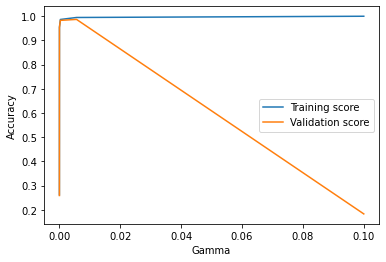

In [28]:
from sklearn.model_selection import validation_curve
from matplotlib import pyplot as plt
param_range = np.logspace(-6, -1, 5)

# Calculate the training and validation scores for each value of the hyperparameter
train_scores, test_scores = validation_curve(SVC(gamma=0.5), X_train, y_train,
                                             param_name='gamma',
                                             param_range=param_range,
                                             cv=3)

plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation score')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [87]:
dataset = df.to_numpy()
print(len(dataset))
test = [[45,24,32,45,52,5.9,95]]
test = test[0]
print(test)

2200
[45, 24, 32, 45, 52, 5.9, 95]


In [88]:
from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    print(distances)
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors
 
neighbors = get_neighbors(dataset, test, 100)
pred=[]
for neighbor in neighbors:
    pred.append(neighbor[-1])

[(array([39, 24, 31, 33.55695561, 53.72979826, 4.757114897, 98.67527561,
       'mango'], dtype=object), 13.124086760246168), (array([38, 19, 31, 34.73823882, 49.08864345, 5.855119267999999,
       90.65022183, 'mango'], dtype=object), 13.739787252963117), (array([39, 16, 27, 35.53845018, 52.94641947, 4.934964765, 91.54560427,
       'mango'], dtype=object), 14.708770438562452), (array([40, 16, 35, 34.16438906, 54.16482251, 4.954739564, 98.33351125,
       'mango'], dtype=object), 14.865747146871474), (array([40, 16, 35, 31.89356292, 49.02450149, 6.4841522000000005,
       89.59371481, 'mango'], dtype=object), 16.702500354970088), (array([38, 15, 27, 33.7462686, 48.50387598, 6.777788126, 92.26439205,
       'mango'], dtype=object), 17.165076917413263), (array([40, 24, 25, 28.70595247, 50.44030129, 5.445008416, 95.8946444,
       'mango'], dtype=object), 18.496909534227214), (array([36, 26, 26, 30.17294105, 51.0845903, 6.814630246, 95.23444287,
       'mango'], dtype=object), 18.5071932

In [89]:
# x = np.array(pred)
print(max(set(pred), key = pred.count))

mango


In [90]:
np.unique(pred).tolist()

['maize', 'mango', 'mothbeans']